In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Download text processing libraries and create dictionaries

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '\xa0', '\t',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '\u3000', '\u202f',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '«',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

mispell_dict = {"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"couldnt" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"doesnt" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"havent" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"shouldnt" : "should not",
"that's" : "that is",
"thats" : "that is",
"there's" : "there is",
"theres" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"theyre":  "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"}


## More examples of misspelling mistakes:
mispell_dict2 = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 
                'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor',
                'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 
                'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 
                'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many',
                'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation',
                'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota',
                'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 
                'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}

def clean_text(text):
    
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text) #remove all except A-Z, a-z, 0-9   
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]    
    text = " ".join(text)
    return(text)

def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re

def replace_typical_misspell(text):
    mispellings, mispellings_re = _get_mispell(mispell_dict)

    def replace(match):
        return mispellings[match.group(0)]

    return mispellings_re.sub(replace, text)

In [244]:
# Tokenize text
def tokenize_text(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokenized_text = tokenizer.tokenize(text)
    return tokenized_text

# Pre_process text
def text_preprocessing(df, col):
    print("Data cleaning started........")
    df[col] = df[col].apply(lambda x: clean_text(x))
    df[col] = df[col].apply(lambda x : replace_typical_misspell(str(x)))
    df[col] = df[col].apply(lambda x: tokenize_text(x))
    print("Data cleaning Done........")
    return df

In [245]:
# Load and inspect datasets

ratings_df = pd.read_csv('ratings.csv', usecols=['name', 'rating', 'review'])

print('Ratings DF:')
print('Shape:', ratings_df.shape)
print('Columns:', ratings_df.columns)
ratings_df.isnull().sum()

Ratings DF:
Shape: (1319968, 3)
Columns: Index(['name', 'rating', 'review'], dtype='object')


name         0
rating       0
review    3044
dtype: int64

In [246]:
ratings_df.dropna(inplace=True)
ratings_df.isnull().sum()

name      0
rating    0
review    0
dtype: int64

In [247]:
print(ratings_df.shape)
ratings_df.head()

(1316924, 3)


,name,rating,review
0,Jalsa,4.0,A beautiful place to dine inThe interiors take...
1,Jalsa,4.0,I was here for dinner with my family on a week...
2,Jalsa,2.0,Its a restaurant near to Banashankari BDA Me a...
3,Jalsa,4.0,We went here on a weekend and one of us had th...
4,Jalsa,5.0,The best thing about the place is its ambiance...


In [248]:
ratings_df.dtypes

name       object
rating    float64
review     object
dtype: object

In [287]:
ratings_sample = ratings_df.sample(frac=0.01, random_state=1).reset_index().drop(columns='index')
print(ratings_sample.shape)
ratings_sample.head()

(13169, 3)


,name,rating,review
0,XO Belgian Waffle,5.0,Bakasura hasnt visited the place but has order...
1,Shiro,5.0,Is this place for real Felt like we were insid...
2,Cafe Azzure,3.0,Food 355\nAmbience 45\nService 35\nOverall ave...
3,Hammered,4.0,Before I come to the food let me just take a m...
4,Paradise,5.0,Ordered about 2 mutton biriyani and 3 chicken ...


In [288]:
ratings_sample['review'] = ratings_sample['review'].apply(lambda x: clean_text(x))
ratings_sample.head()

,name,rating,review
0,XO Belgian Waffle,5.0,bakasura hasnt visited place ordered yes got h...
1,Shiro,5.0,place real felt like inside oriental fairytale...
2,Cafe Azzure,3.0,food 355 ambience 45 service 35 overall averag...
3,Hammered,4.0,come food let take moment appreciate artistic ...
4,Paradise,5.0,ordered 2 mutton biriyani 3 chicken biriyani f...


In [289]:
ratings_sample['review']  = ratings_sample['review'].apply(lambda x : replace_typical_misspell(str(x)))
ratings_sample.head()

,name,rating,review
0,XO Belgian Waffle,5.0,bakasura hasnt visited place ordered yes got h...
1,Shiro,5.0,place real felt like inside oriental fairytale...
2,Cafe Azzure,3.0,food 355 ambience 45 service 35 overall averag...
3,Hammered,4.0,come food let take moment appreciate artistic ...
4,Paradise,5.0,ordered 2 mutton biriyani 3 chicken biriyani f...


In [317]:
ratings_tokenized = text_preprocessing(ratings_sample, 'review')
ratings_tokenized

Data cleaning started........
Data cleaning Done........


,name,rating,review,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,XO Belgian Waffle,5.0,"[bakasura, hasnt, visited, place, ordered, yes...",0.117,0.561,0.322,0.8406
1,Shiro,5.0,"[place, real, felt, like, inside, oriental, fa...",0.041,0.649,0.310,0.9225
2,Cafe Azzure,3.0,"[food, 355, ambience, 45, service, 35, overall...",0.000,0.800,0.200,0.7906
3,Hammered,4.0,"[come, food, let, take, moment, appreciate, ar...",0.057,0.658,0.285,0.9701
4,Paradise,5.0,"[ordered, 2, mutton, biriyani, 3, chicken, bir...",0.167,0.833,0.000,-0.3818
...,...,...,...,...,...,...,...
13164,154 Breakfast Club,1.0,"[went, breakfast, ordered, veg, medley, masala...",0.299,0.701,0.000,-0.7501
13165,Aaranya Restaurant,3.0,"[ambience, lot, like, coconut, groove, properl...",0.000,0.832,0.168,0.8074
13166,Kulfi & More,4.0,"[jus, awesome, place, kulfi, reminds, tat, chi...",0.000,0.619,0.381,0.9231
13167,Brooks and Bonds Brewery,5.0,"[brooks, bonds, located, koramangala, bookmark...",0.000,0.747,0.253,0.9741


In [290]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_ = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
reviews_vectorized = vectorizer_.fit_transform(ratings_sample['review'])

In [291]:
reviews_vectorized

<13169x4814 sparse matrix of type '<class 'numpy.int64'>'
	with 285599 stored elements in Compressed Sparse Row format>

In [292]:
# load the SentimentIntensityAnalyser object in
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [293]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))
    
# getting only the negative score
def negative_score(text):
    negative_value = analyser.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyser.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyser.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyser.polarity_scores(text)['compound']
    return compound_value

In [294]:
ratings_sample['sentiment_neg'] = ratings_sample['review'].apply(negative_score)
ratings_sample['sentiment_neu'] = ratings_sample['review'].apply(neutral_score)
ratings_sample['sentiment_pos'] = ratings_sample['review'].apply(positive_score)
ratings_sample['sentiment_compound'] = ratings_sample['review'].apply(compound_score)

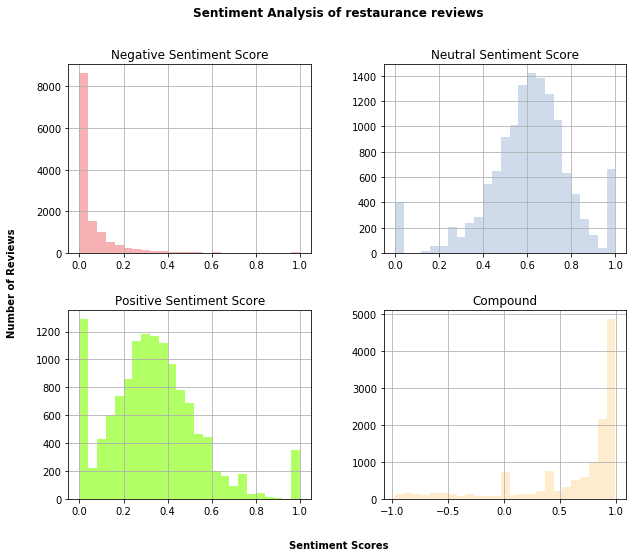

In [295]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
ratings_sample.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
ratings_sample.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
ratings_sample.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
ratings_sample.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of restaurance reviews', fontsize=12, fontweight='bold');

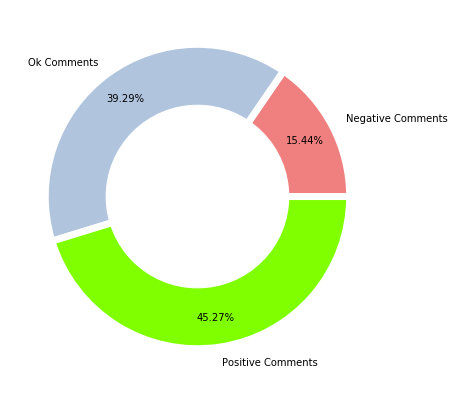

In [297]:
percentiles = ratings_sample.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])

# assign the data
neg = percentiles['20%']
mid = percentiles['50%']
pos = percentiles['max']
names = ['Negative Comments', 'Ok Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [300]:
# full dataframe with POSITIVE comments
df_pos = ratings_sample.loc[ratings_sample.sentiment_compound >= 0.8]

# only corpus of POSITIVE comments
pos_comments = df_pos['review'].tolist()

# full dataframe with NEGATIVE comments
df_neg = ratings_sample.loc[ratings_sample.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['review'].tolist()

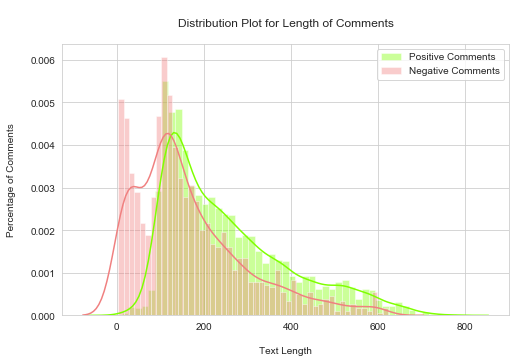

In [301]:
df_pos['text_length'] = df_pos['review'].apply(len)
df_neg['text_length'] = df_neg['review'].apply(len)

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

In [272]:
from sklearn.feature_extraction.text import TfidfVectorizer



tfidf = TfidfVectorizer()
tfidf_fit = tfidf.fit_transform(ratings_sample['review'])

In [274]:
tfidf_fit

<132x1612 sparse matrix of type '<class 'numpy.float64'>'
	with 3708 stored elements in Compressed Sparse Row format>

In [275]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

lda_model = lda.fit(tfidf_fit)

params = lda_model.get_params

In [276]:
# Define helper function to print top words

def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [277]:
n_top_words = 20
print("\nTopics in LDA model: ")
tf_feature_names = tfidf.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:beef good tried place time hours rendang rates chicken crispy bandi jugal everyones flavor chewy filled throughout happy far although

Topic #1:attention bake real ordinary may delivery chocolates manager breathtaking block weve higher naan akki serves much paneer lit place packed

Topic #2:please never order lot half food worst materials every expected well packing placenot times sit chicken games dropped bloody everything

Topic #3:whooppeezzo quite worst put hospitable hope proper awesome road look dalda dum icing dim suggestion enter except pricing started block

Topic #4:nice toppings wanna irritating compensation cinnamons sweetif pulao quantity tangri ambience bag cheesy therapy 45 creativity chips teasome pieces must

Topic #5:different times potatoes meals variety entire keep curries food unpleasant flavours right malai quality sit serviceambience 200 phenomenal roots hummus

Topic #6:good small prime screating waste lake organising beautiful w

In [360]:
from gensim import corpora, models
import gensim

doc_clean = [comment.split() for comment in str(ratings_sample['review'])]

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(doc_clean)
dictionary.save('dictionary.dict')
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in doc_clean]
corpora.MmCorpus.serialize('corpus_s.mm', corpus)

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=20)
ldamodel.save('topic.model')

In [361]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [362]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus_s.mm')
lda = gensim.models.LdaModel.load('topic.model')

In [363]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.411363 -0.131145       1        1  15.317514
5      0.080549  0.422267       2        1  13.234134
1     -0.077719 -0.031758       3        1  11.249996
7     -0.057436 -0.020719       4        1  10.853166
9     -0.080339 -0.048876       5        1   9.861103
4     -0.020604 -0.005673       6        1   9.563483
0     -0.081048 -0.051624       7        1   9.067451
8     -0.080085 -0.052787       8        1   8.869040
6     -0.054372 -0.043371       9        1   6.388885
2     -0.040310 -0.036315      10        1   5.595234, topic_info=   Category       Freq Term      Total  loglift  logprob
3   Default  34.000000    a  34.000000  30.0000  30.0000
14  Default  41.000000    e  41.000000  29.0000  29.0000
8   Default  42.000000    ,  42.000000  28.0000  28.0000
21  Default  29.000000    .  29.000000  27.0000  27.0000
19  Default  27.000000    o  27.000000  26.0000  26.0000
17  Default  22.000000    l  22.000000  25.0000  25.0000
26  Default  15.000000    5  15.000000  24.0000  24.0000
18  Default  19.000000    c  19.000000  23.0000  23.0000
7   Default  21.000000    r  21.000000  22.0000  22.0000
13  Default  18.000000    i  18.000000  21.0000  21.0000
15  Default  15.000000    d  15.000000  20.0000  20.0000
12  Default  11.000000    v  11.000000  19.0000  19.0000
27  Default  14.000000    m  14.000000  18.0000  18.0000
10  Default  14.000000    n  14.000000  17.0000  17.0000
9   Default  10.000000    h  10.000000  16.0000  16.0000
11  Default  16.000000    t  16.000000  15.0000  15.0000
4   Default  11.000000    k  11.000000  14.0000  14.0000
1   Default  11.000000    [  11.000000  13.0000  13.0000
22  Default  12.000000    1  12.000000  12.0000  12.0000
16  Default  10.000000    p  10.000000  11.0000  11.0000
25  Default  10.000000    3  10.000000  10.0000  10.0000
2   Default  10.000000    b  10.000000   9.0000   9.0000
5   Default  14.000000    s  14.000000   8.0000   8.0000
29  Default   8.000000    6   8.000000   7.0000   7.0000
23  Default   7.000000    f   7.000000   6.0000   6.0000
24  Default   4.000000    2   4.000000   5.0000   5.0000
0   Default   4.000000    0   4.000000   4.0000   4.0000
31  Default   5.000000    g   5.000000   3.0000   3.0000
20  Default   5.000000    y   5.000000   2.0000   2.0000
30  Default   4.000000    w   4.000000   1.0000   1.0000
8    Topic1  41.565445    ,  42.712639   1.8489  -0.6191
11   Topic1  15.812506    t  16.924257   1.8082  -1.5856
5    Topic1  12.946998    s  14.066937   1.7932  -1.7855
6    Topic1   3.649407    u   4.758035   1.6109  -3.0518
38   Topic1   0.787141    9   1.895512   0.9973  -4.5857
34   Topic1   0.071561    8   1.947691  -1.4277  -6.9836
35   Topic1   0.071561    N   2.049485  -1.4786  -6.9836
37   Topic1   0.071561    L   2.197963  -1.5486  -6.9836
33   Topic1   0.071561    7   2.977383  -1.8521  -6.9836
32   Topic1   0.071561    j   3.263591  -1.9439  -6.9836
36   Topic1   0.071561    :   3.483373  -2.0090  -6.9836
28   Topic1   0.071561    4   3.723004  -2.0756  -6.9836
0    Topic1   0.071561    0   4.015850  -2.1513  -6.9836
30   Topic1   0.071921    w   4.234829  -2.1994  -6.9786
24   Topic1   0.071561    2   4.774851  -2.3244  -6.9836
31   Topic1   0.071561    g   5.347542  -2.4377  -6.9836
20   Topic1   0.071921    y   5.528270  -2.4659  -6.9786
23   Topic1   0.071561    f   7.431356  -2.7667  -6.9836
29   Topic1   0.071921    6   8.473290  -2.8929  -6.9786
9    Topic1   0.071561    h  10.166437  -3.0801  -6.9836
16   Topic1   0.071561    p  10.344481  -3.0975  -6.9836
2    Topic1   0.071561    b  10.575319  -3.1195  -6.9836
25   Topic1   0.071561    3  10.575399  -3.1196  -6.9836
1    Topic1   0.071561    [  11.363078  -3.1914  -6.9836
4    Topic1   0.071561    k  11.802859  -3.2294  -6.9836
12   Topic1   0.072280    v  11.963161  -3.2329  -6.9736
22   Topic1   0.071561    1  12.201762  -3.2626  -6.9836
27 

In [365]:
lda_ = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online',verbose=True)
reviews_lda = lda_.fit_transform(reviews_vectorized)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


In [366]:
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [367]:
print("Tweets LDA Model:")
selected_topics(lda_, vectorizer_)

Tweets LDA Model:
Topic 0:
[('cake', 509.17830869048043), ('place', 446.3959262172908), ('coffee', 337.6549602430357), ('red', 283.5083624999876), ('waffle', 272.9563969505553), ('sandwich', 269.1226524062807), ('like', 267.7548003212337), ('try', 224.7696051075607), ('outside', 193.09424698937477), ('cakes', 192.57335815579768)]
Topic 1:
[('food', 4397.465905195503), ('good', 3812.495002149081), ('place', 3724.1690614763024), ('service', 1747.2399214844263), ('taste', 1460.9636712691565), ('really', 1425.681180901219), ('amazing', 1266.584043312221), ('try', 1220.2560974744188), ('great', 1181.6156118204522), ('ambience', 1067.6256561346263)]
Topic 2:
[('place', 4443.374402203603), ('good', 4099.5462475679215), ('food', 2490.7484024208297), ('ambience', 1986.7561049189756), ('service', 1579.7926176808446), ('great', 1461.3144442778455), ('nice', 1301.4893722338902), ('friends', 820.6323256628089), ('staff', 795.1295201521951), ('really', 705.56881419163)]
Topic 3:
[('cold', 323.305737